<a href="https://colab.research.google.com/github/Maithraanand/Financial-Machine-Learning-FML-/blob/main/Yield_Curve_Prediction_FML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YIELD CURVE PREDICTION

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

**Load the datset**

In [ ]:
file_path = 'Yield curve dataset.csv'  # Replace with your dataset path
df = pd.read_csv(file_path)

# View the first few rows of the dataset
print(df.head())

         date 1 year yield 2 year yield 5 year yield 10 year yield  \
0  2023-03-01        1.45%        1.70%        2.20%         2.45%   
1  2023-04-01        1.55%        1.80%        2.30%         2.55%   
2  2023-05-01        1.65%        1.90%        2.40%         2.65%   
3  2023-06-01        1.75%        2.00%        2.50%         2.75%   
4  2023-07-01        1.85%        2.10%        2.60%         2.85%   

  30 year yield inflation rate  gdp growth  fed funds rate  S&P 500  VIX  \
0         2.95%           2.3%         3.7            0.35     4000   19   
1         3.05%           2.4%         3.8            0.40     4050   17   
2         3.15%           2.5%         3.9            0.45     4100   16   
3         3.25%           2.6%         4.0            0.50     4150   15   
4         3.35%           2.7%         4.1            0.55     4200   14   

   Yield spread(10Y-2Y)  
0                  0.75  
1                  0.75  
2                  0.75  
3                 

In [ ]:
# Convert percentage strings to float
# Remove '%' and convert the columns to float by dividing by 100
columns_to_convert = ['1 year yield', '2 year yield', '5 year yield', '10 year yield', '30 year yield']

for column in columns_to_convert:
    # Ensure the column is treated as a string before applying string operations
    df[column] = df[column].astype(str)

    # Remove '%' and convert to float, dividing by 100
    df[column] = df[column].str.replace('%', '').astype(float) / 100


**Data Preprocessing**

In [ ]:
# Set the 'Date' column as the index (if it exists)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# Display information about the dataset
print(df.info())

# Check for missing values (if any)
print(df.isnull().sum())

# Drop missing values or handle them (e.g., using forward fill)
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  50 non-null     object 
 1   1 year yield          50 non-null     float64
 2   2 year yield          50 non-null     float64
 3   5 year yield          50 non-null     float64
 4   10 year yield         50 non-null     float64
 5   30 year yield         50 non-null     float64
 6   inflation rate        50 non-null     object 
 7   gdp growth            50 non-null     float64
 8   fed funds rate        50 non-null     float64
 9   S&P 500               50 non-null     int64  
 10  VIX                   50 non-null     int64  
 11  Yield spread(10Y-2Y)  50 non-null     float64
dtypes: float64(8), int64(2), object(2)
memory usage: 4.8+ KB
None
date                    0
1 year yield            0
2 year yield            0
5 year yield            0
10 year yiel

**Training and Testing**

In [ ]:
# Independent variables (X) and target variable (y)
# Assuming you want to predict the '10 year yield' bond yield
X = df[['1 year yield', '2 year yield', '5 year yield', '30 year yield']]  # Features
y = df['10 year yield']  # Target (10 year yield bond yield)

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
alpha_value = 0.01  # You can adjust this for more/less regularization
model = Lasso(alpha=alpha_value)
model.fit(X_train, y_train)

Lasso(alpha=0.01)

**Model Selection and Training**

In [ ]:
# Initialize Lasso Regression model with alpha parameter for regularization strength
model = Lasso(alpha=0.01)  # You can tune the alpha value for stronger/weaker regularization

# Train the model
model.fit(X_train, y_train)

# Display the model coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [0. 0. 0. 0.]
Intercept: 0.0595


**Prediction**

In [ ]:
# Predict the test set results
y_pred = model.predict(X_test)

# Compare predicted vs actual values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

    Actual  Predicted
13   0.042     0.0595
39   0.086     0.0595
30   0.068     0.0595
45   0.098     0.0595
17   0.048     0.0595


In [ ]:
# Calculate Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.000499
R-squared: -0.20966764442074126


**Visualization**

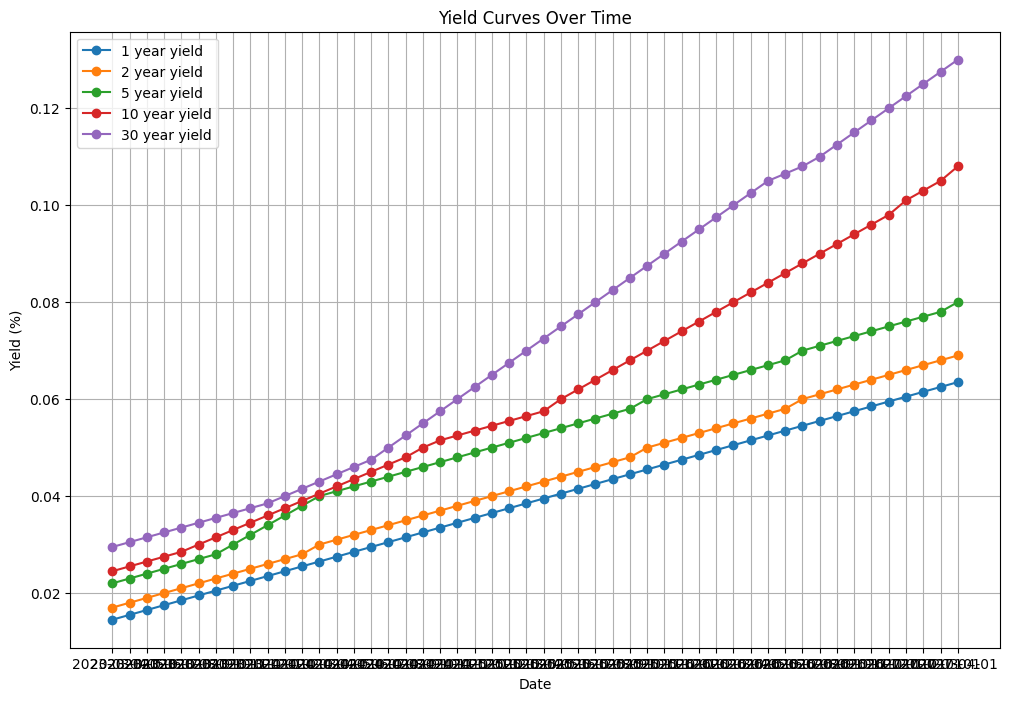

In [ ]:
# Plot the yield curves
plt.figure(figsize=(12, 8))

for col in yield_columns:
    plt.plot(df['date'], df[col], marker='o', linestyle='-', label=col)

# Adding titles and labels
plt.title('Yield Curves Over Time')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

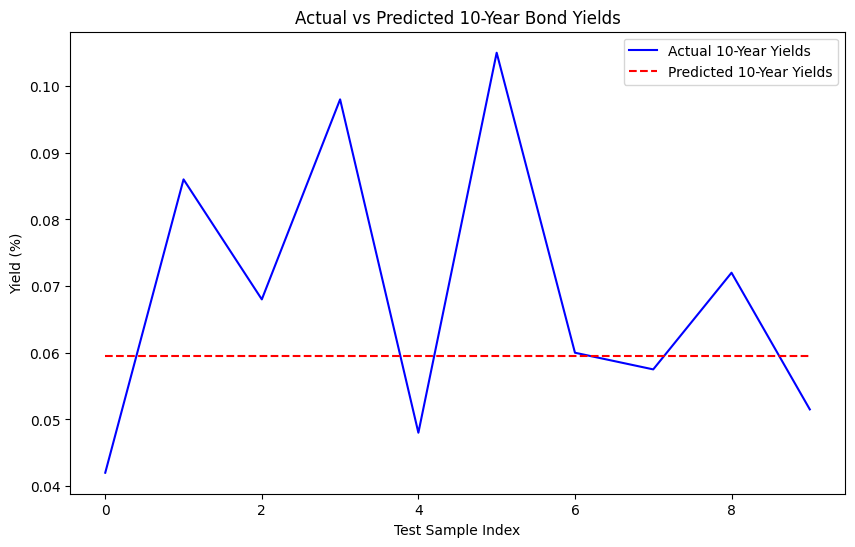

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual 10-Year Yields', color='blue')
plt.plot(y_pred, label='Predicted 10-Year Yields', color='red', linestyle='--')
plt.title('Actual vs Predicted 10-Year Bond Yields')
plt.xlabel('Test Sample Index')
plt.ylabel('Yield (%)')
plt.legend()
plt.show()